# Imports

In [170]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from itertools import chain

# Load Data

In [171]:
# Create pandas dataframe from csv
dfWT = pd.read_csv("../program/log/MainLogWithTarjan.csv", sep=",", header=0)
dfNT = pd.read_csv("../program/log/MainLogNoTarjan.csv", sep=",", header=0)
dfMinMaxK = pd.read_csv("../program/log/OverviewMinMaxK.csv", sep=",", header=0)
dfSolutions = pd.read_csv("../inputs/optimal_solution_sizes.csv", sep=",", header=0)

# Merge
dfWT = dfWT.merge(dfSolutions, on = "name", how = 'inner')
dfNT = dfNT.merge(dfSolutions, on = "name", how = 'inner')

# Replace
dfWT.loc[dfWT['verified'] != True, 'k'] = dfWT['optimalK']
dfNT.loc[dfNT['verified'] != True, 'k'] = dfNT['optimalK']

# Filter
dfWT = dfWT[dfWT['k'] <= 20]
dfNT = dfNT[dfNT['k'] <= 20]

# Mean
dfWT_mean = dfWT.groupby('k').mean()
dfNT_mean = dfNT.groupby('k').mean()

# Boxplot

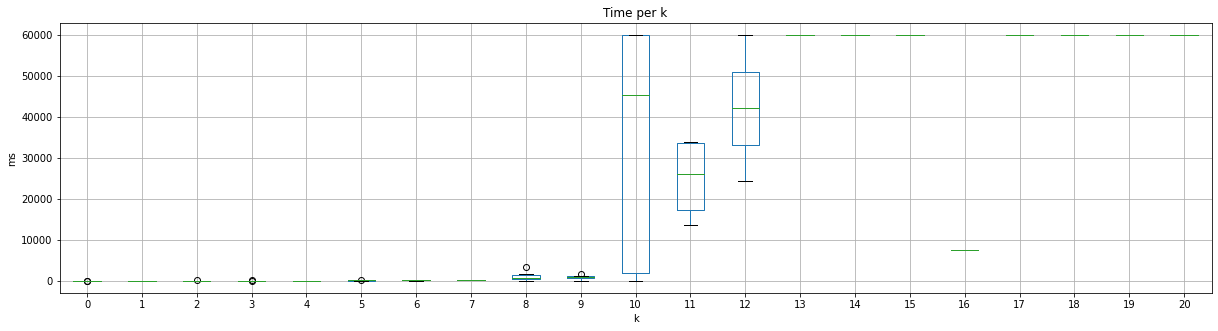

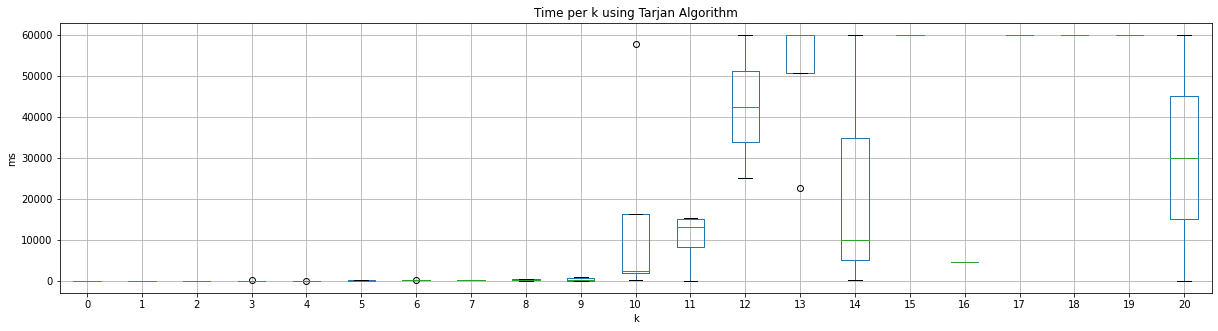

In [172]:
# Without Tarjan
axes = dfNT.boxplot(column='millis', by='k', figsize=(20,5))
fig = axes.get_figure().suptitle('')
plt.xlabel('k')
plt.ylabel('ms')
plt.title('Time per k')
plt.savefig('plots/TimeBoxPlotNoTarjan.png',  bbox_inches='tight')
plt.show()

# With Tarjan
axes = dfWT.boxplot(column='millis', by='k', figsize=(20,5))
fig = axes.get_figure().suptitle('')
plt.xlabel('k')
plt.ylabel('ms')
plt.title('Time per k using Tarjan Algorithm')
plt.savefig('plots/TimeBoxPlotWithTarjan.png',  bbox_inches='tight')
plt.show()

# Line Plot

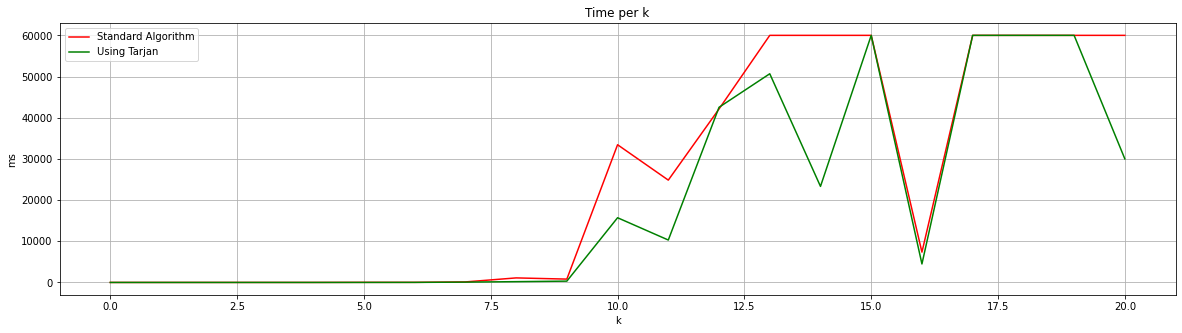

In [173]:
plt.figure(figsize=(20,5))
plt.plot(dfNT_mean['millis'], c='Red', label="Standard Algorithm")
plt.plot(dfWT_mean['millis'], c='Green', label="Using Tarjan")
plt.xlabel('k')
plt.ylabel('ms')
plt.title('Time per k')
plt.grid()
plt.legend()
plt.savefig('plots/TimeLinePlotCombined.png',  bbox_inches='tight')
plt.show()

# K-Value Borders

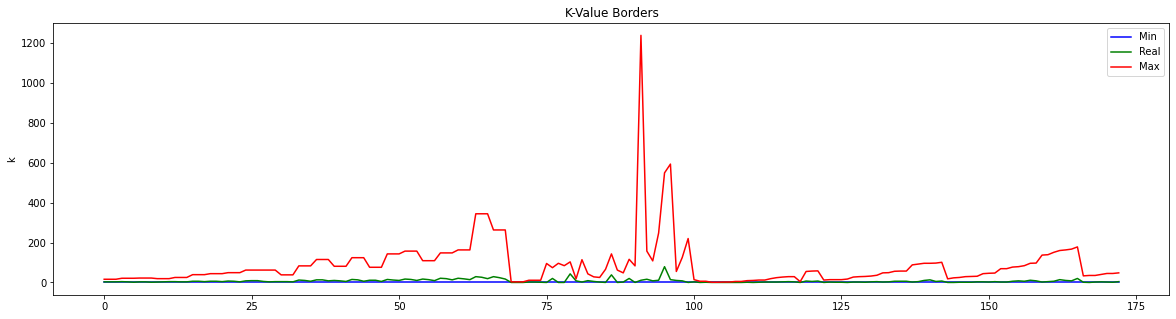

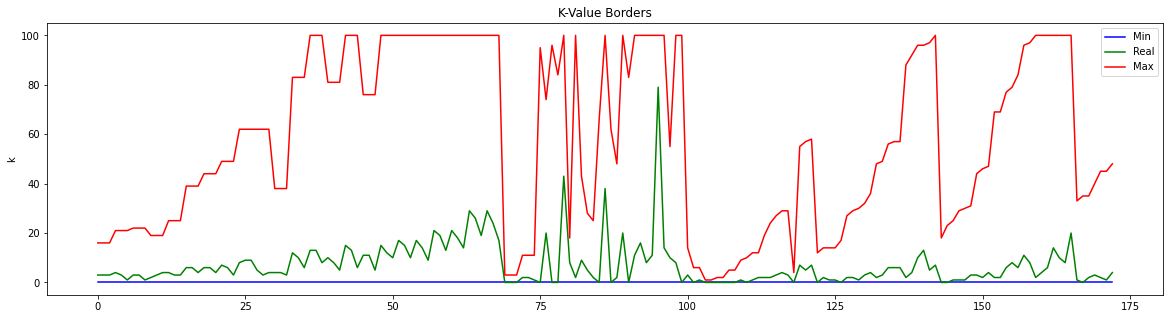

In [174]:
# K-Value Borders
plt.figure(figsize=(20,5))
plt.plot(dfMinMaxK["min"], c = 'blue', label="Min")
plt.plot(dfMinMaxK["real"], c = 'green', label="Real")
plt.plot(dfMinMaxK["max"], c = 'red', label="Max")
plt.title('K-Value Borders')
plt.ylabel('k')
plt.legend()
plt.savefig('plots/MinMaxKLinePlotCombined.png',  bbox_inches='tight')
plt.show()

# K-Value Borders cropped at 100
dfMinMaxK['max'] = dfMinMaxK['max'].where(dfMinMaxK['max'] <= 100, 100)
plt.figure(figsize=(20,5))
plt.plot(dfMinMaxK["min"], c = 'blue', label="Min")
plt.plot(dfMinMaxK["real"], c = 'green', label="Real")
plt.plot(dfMinMaxK["max"], c = 'red', label="Max")
plt.title('K-Value Borders')
plt.ylabel('k')
plt.legend()
plt.savefig('plots/MinMaxKLinePlotCombinedClipped.png',  bbox_inches='tight')
plt.show()